In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix
from wordcloud import WordCloud
#import decision tree classifier
from sklearn.tree import DecisionTreeClassifier
import pickle

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df=pd.read_csv('/content/flipkart.csv')
df.head()

,Unnamed: 0,Product_name,Review,Rating
0,0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5


In [ ]:
# dropping column product_name
df.drop('Product_name',axis=1,inplace=True)
df.head()

,Unnamed: 0,Review,Rating
0,0,Best under 60k Great performanceI got it for a...,5
1,1,Good perfomence...,5
2,2,Great performance but usually it has also that...,5
3,3,My wife is so happy and best product 👌🏻😘,5
4,4,"Light weight laptop with new amazing features,...",5


In [ ]:
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['Review']=df['Review'].str.lower()
cleaned_reviews = []
for review in df['Review']:
    words = review.split()
    filtered = []
    for word in words:
        if word not in stop_words:
            filtered.append(word)
    cleaned_reviews.append(' '.join(filtered))

df['Review'] = cleaned_reviews

In [ ]:
sentiments = []
for rating in df['Rating']:
    if rating >= 4:
        sentiments.append(1)
    else:
        sentiments.append(0)

df['sentiment'] = sentiments

In [ ]:
df['sentiment'] = df['sentiment'].map({0: 'Negative', 1: 'Positive'})


<Axes: xlabel='sentiment', ylabel='count'>

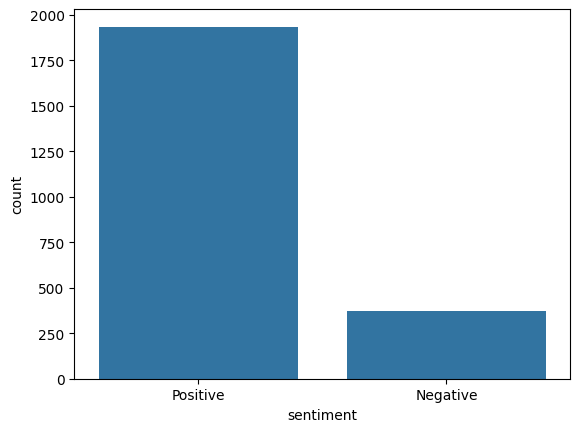

In [ ]:
x=df['sentiment'].value_counts().reset_index()
sns.barplot(x='sentiment',y='count',data=x)


In [ ]:
positive_rev=df[df['sentiment']=='Positive']['Review'] # Extracting the review column where sentiment ==1

In [ ]:
positive_rev.head()

,Review
0,best 60k great performancei got around 58500ba...
1,good perfomence...
2,great performance usually also gaming laptop's...
3,wife happy best product 👌🏻😘
4,"light weight laptop new amazing features, batt..."


In [ ]:
joimed_positive_review=' '.join(positive_rev)

In [ ]:
wc=WordCloud(width=1000,height=500,background_color='white').generate(joimed_positive_review)

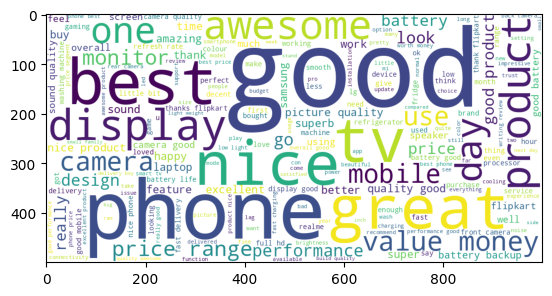

In [ ]:
plt.imshow(wc)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Review'])
y = df['sentiment']

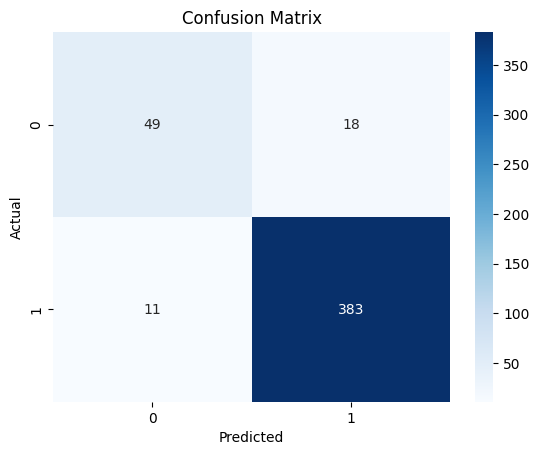

0.9370932754880694


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix , annot=True,fmt='d', cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(accuracy)

In [ ]:
model.predict(vectorizer.transform(['excellent product']))

array(['Positive'], dtype=object)

In [ ]:
with open('sentiment_model.pkl', 'wb') as f:
    pickle.dump(model, f)